## Monty Hall Problem

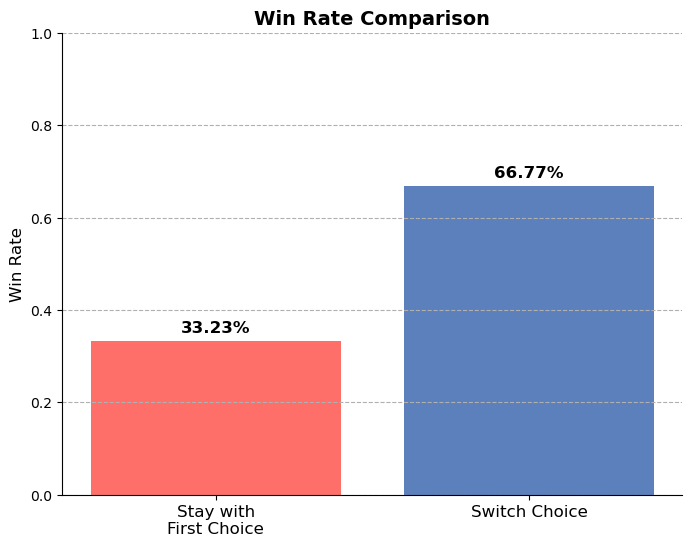

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the number of simulations
num_simulations = 10000

# Initialize lists to store the data
first_choices = []
new_choices = []
correct_gates = []

# Simulate the game show scenario
for _ in range(num_simulations):
    # Randomly assign the car behind one of the doors (0, 1, or 2)
    car_door = np.random.randint(3)
    
    # Randomly choose the contestant's first choice
    first_choice = np.random.randint(3)
    
    # Determine the door the host will open (revealing a goat)
    remaining_doors = [0, 1, 2]
    remaining_doors.remove(first_choice)
    if car_door in remaining_doors:
        remaining_doors.remove(car_door)
    opened_door = np.random.choice(remaining_doors)
    
    # Determine the new choice (switching the door)
    new_choice = list(set([0, 1, 2]) - set([first_choice, opened_door]))[0]
    
    # Record the information in the lists
    first_choices.append(first_choice)
    new_choices.append(new_choice)
    correct_gates.append(car_door)

# Create a DataFrame to store the recorded information
data = pd.DataFrame({'First Choice': first_choices,
                     'New Choice': new_choices,
                     'Correct Gate': correct_gates})

# Calculate the win rate for staying with the first choice and switching
stay_win_rate = (data['First Choice'] == data['Correct Gate']).mean()
switch_win_rate = (data['New Choice'] == data['Correct Gate']).mean()

# Plot the win rates
colors = ['#ff6f69', '#5c80bc']

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar plot
labels = ['Stay with\nFirst Choice', 'Switch Choice']
win_rates = [stay_win_rate, switch_win_rate]
ax.bar(labels, win_rates, color=colors)

# Set the y-axis limits and label
ax.set_ylim(0, 1)
ax.set_ylabel('Win Rate', fontsize=12)

# Add a title and grid
ax.set_title('Win Rate Comparison', fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--')

# Add percentages above the bars
for i, v in enumerate(win_rates):
    ax.text(i, v + 0.02, f'{v:.2%}', color='black', ha='center', fontsize=12, fontweight='bold')

# Customize the tick labels
ax.tick_params(axis='x', labelrotation=0, labelsize=12)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

# Display the DataFrame and the plot

plt.show()